In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
import scipy as stats

In [2]:
df=pd.read_csv("C:\\Users\\chora\\OneDrive\\Desktop\\Nexthike\\Processed_Flipdata - Processed_Flipdata.csv")

In [3]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [5]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


# Data Preprocessing

In [6]:
df.isna().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [7]:
#removing commas from prize and converting dtype to int
df['Prize']=[int(value.replace(",",""))for value in df['Prize']]

In [8]:
df['Prize']

0       7299
1       7299
2      11999
3       5649
4       8999
       ...  
536    79999
537     5998
538     9990
539    38999
540    15999
Name: Prize, Length: 541, dtype: int64

In [9]:
# Convert camera resolution columns to integers
df['Rear Camera'] = df['Rear Camera'].str.rstrip('MP').astype(int)
df['Front Camera'] = df['Front Camera'].str.rstrip('MP').astype(int)


In [10]:
print(df['Rear Camera'])
print(df['Front Camera'])

0      13
1      13
2      50
3       8
4      50
       ..
536    50
537     5
538    50
539    50
540    50
Name: Rear Camera, Length: 541, dtype: int32
0       5
1       5
2      16
3       5
4       5
       ..
536    12
537     2
538     8
539    32
540     8
Name: Front Camera, Length: 541, dtype: int32


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    int32  
 7   Front Camera   541 non-null    int32  
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int32(2), int64(6), object(3)
memory usage: 46.6+ KB


In [12]:
df.duplicated().sum()

0

In [13]:
#Dropping Unwanted column
df.drop('Unnamed: 0',axis=1,inplace=True)

The dataset contains information about various mobile phone models, including their color, memory, RAM, battery capacity, camera specifications, AI lens availability, mobile height, processor details, and price.

Memory and RAM have a relatively wide range of values, with a mean of around 110-120 GB and 5-6 GB respectively.

Battery capacity (Battery_) varies between 800 and 7000 mAh, with an average of approximately 4871 mAh.

AI Lens seems to be a relatively uncommon feature, as the mean suggests only around 6% of devices have it.

Mobile heights vary between 4.5 mm and 41.94 mm, with a mean around 16.43 mm.

These statistics provide a quick overview of the dataset's numerical columns, helping to understand their central tendency, dispersion, and range.

There are no missing values in the dataset, which is a good sign. However, some columns like 'Colour', 'Rear Camera', 'Front Camera', and 'Processor_' are object data types and will need to be encoded or processed before building a machine learning model.

# EDA

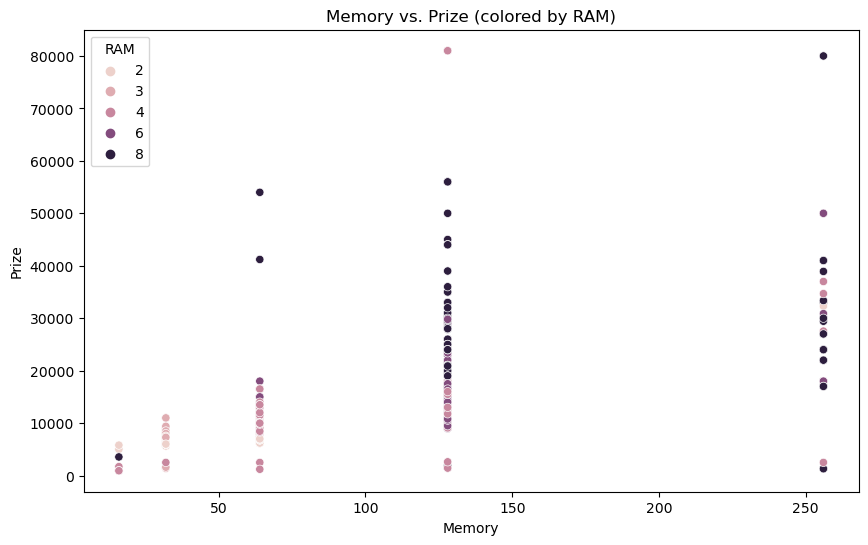

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Memory', y='Prize', hue='RAM')
plt.title('Memory vs. Prize (colored by RAM)')
plt.show()


This scatter plot shows the relationship between the memory, RAM, and the price of mobile phones. As expected, higher memory and RAM generally correspond to higher prices, but there is still a significant variation within each group.


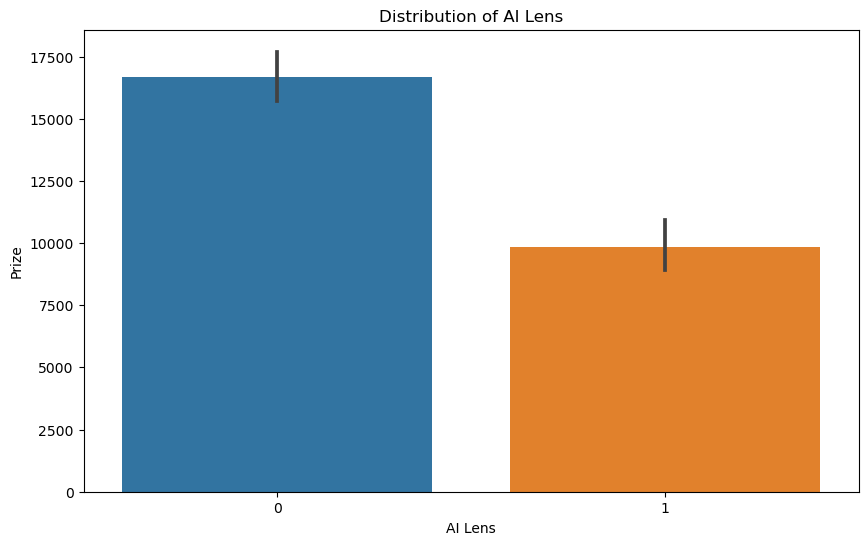

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='AI Lens',y='Prize')
plt.title('Distribution of AI Lens')
plt.show()

This bar chart shows the distribution of the 'AI Lens' feature, which is a binary variable (0 or 1). The majority of mobile phones in the dataset do not have an AI lens (0).

These visualizations provide insights into the relationships between features and the target variable (price). 

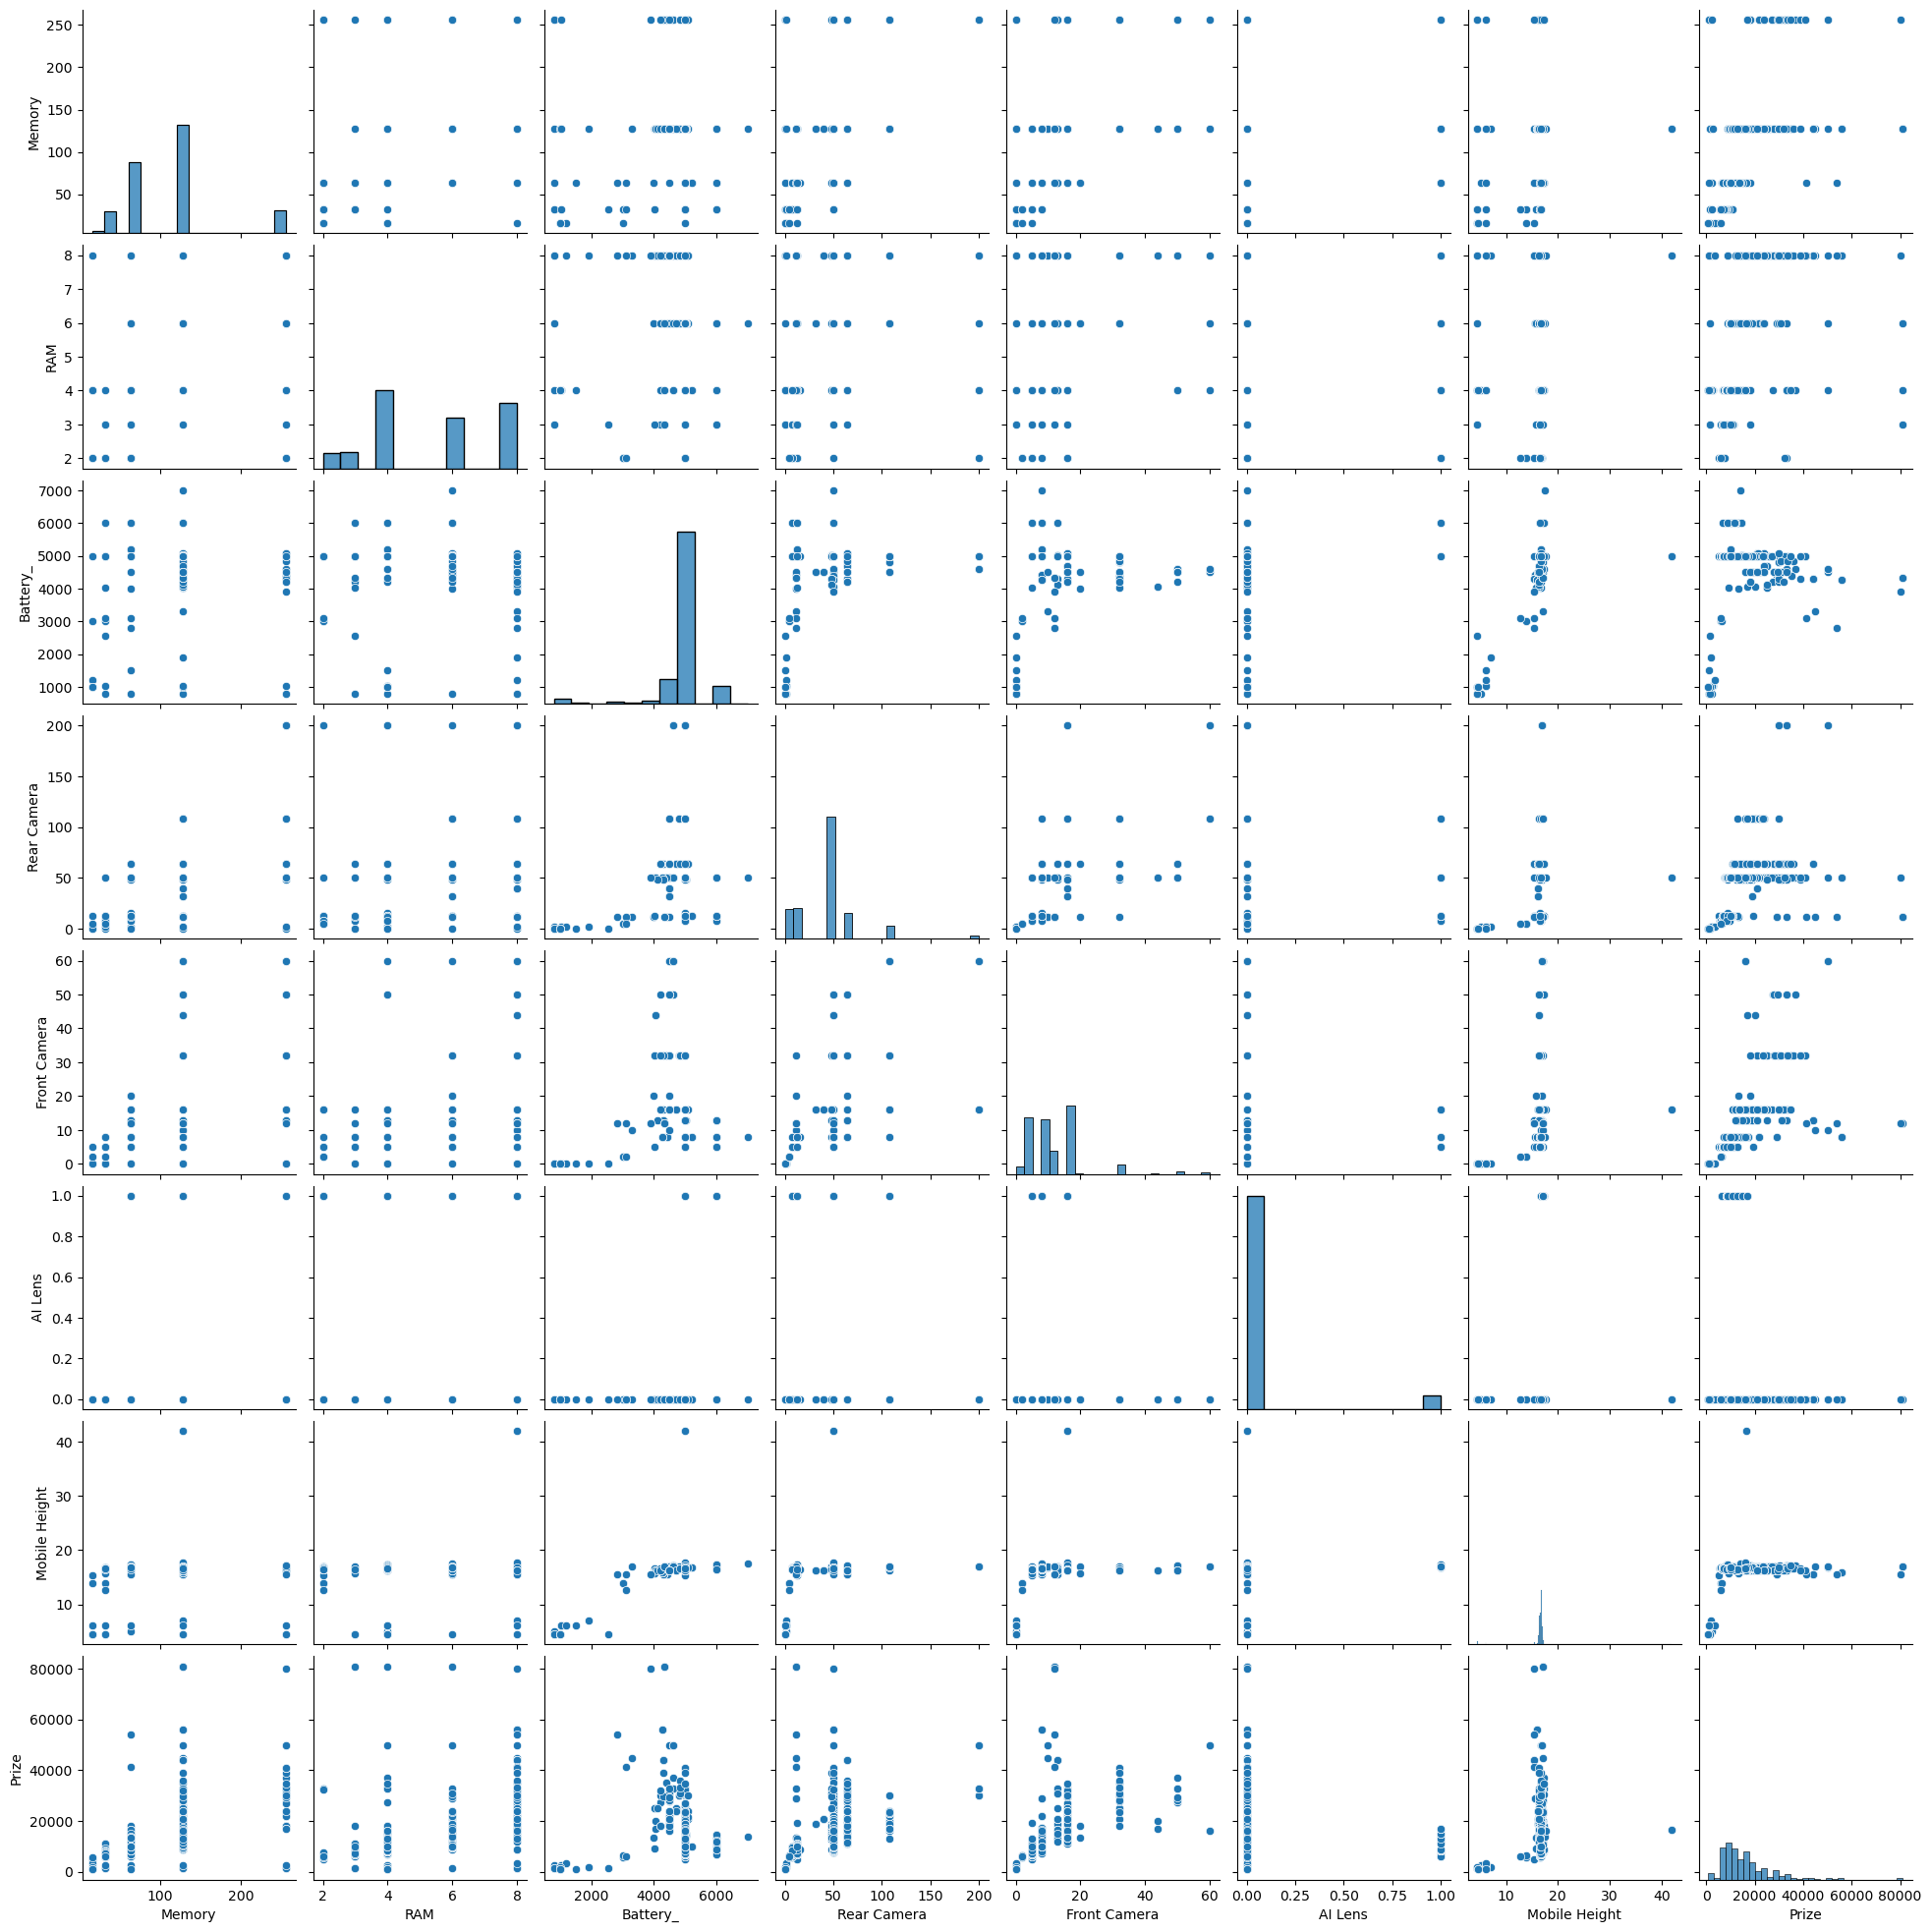

In [16]:
numerical_cols = df.select_dtypes(include=np.number).columns
custom_palette = sns.color_palette("hls", 12)
sns.pairplot(df[numerical_cols], palette=custom_palette)

plt.show()

The dataset consists of 541 entries, each representing a mobile device. It includes various numerical attributes such as Memory (measured in gigabytes), RAM (Random Access Memory in gigabytes), Battery_ (battery capacity in milliampere-hours), Rear Camera and Front Camera resolutions (in megapixels), presence of AI Lens (0 for absent, 1 for present), Mobile Height (in millimeters), and Prize (device price in currency units). These attributes collectively provide insights into the specifications and characteristics of the mobile devices analyzed.

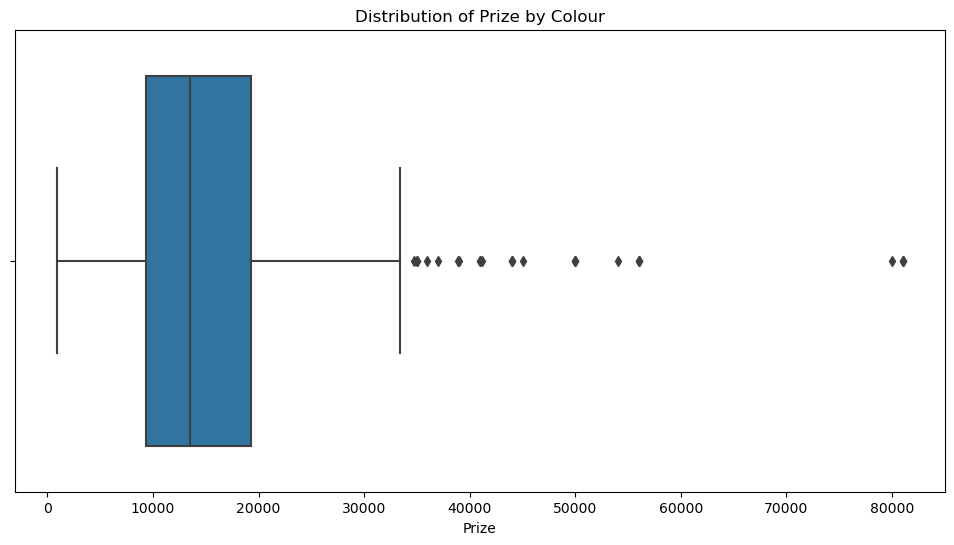

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Prize')
plt.title('Distribution of Prize by Colour')
plt.show()

In [18]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate Q1, Q3, and IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers detection
threshold = 1.5

# Replace outliers with median
for column in numerical_columns:
    median_value = df[column].median()
    
    df[column] = df[column].apply(lambda x: median_value if x < (Q1[column] - threshold * IQR[column]) or x > (Q3[column] + threshold * IQR[column]) else x)


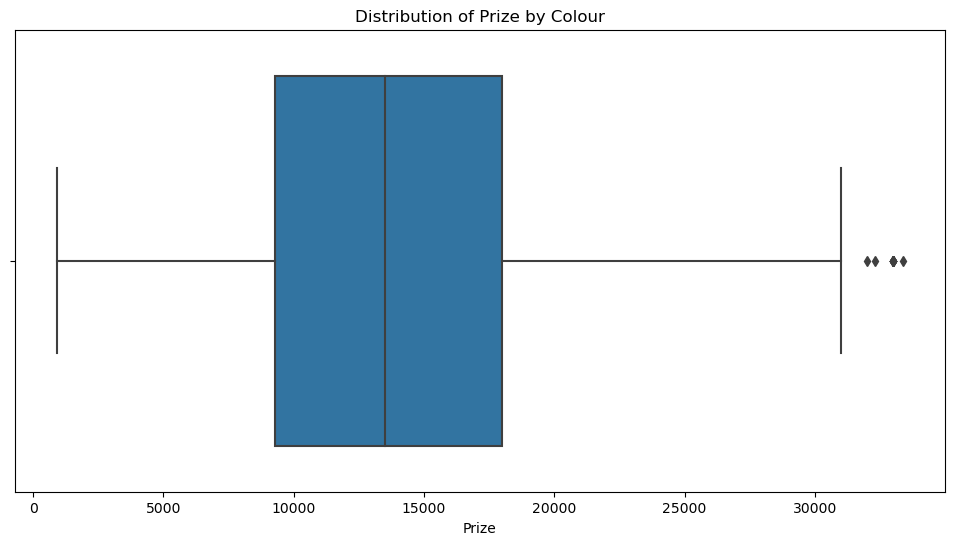

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Prize')
plt.title('Distribution of Prize by Colour')
plt.show()

In [20]:
# Rechecking if there is any outliers
outliers_iqr = (df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR))
outliers_iqr.sum()


Memory           0
RAM              0
Battery_         0
AI Lens          0
Mobile Height    0
Prize            0
dtype: int64

<Axes: xlabel='Prize', ylabel='Count'>

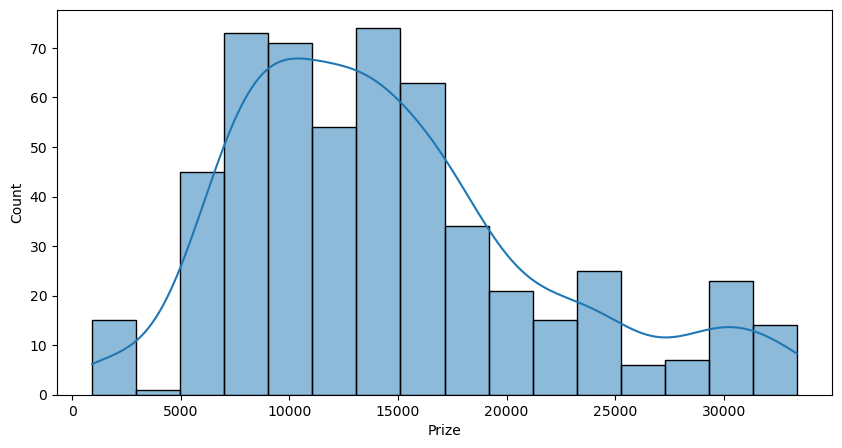

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df['Prize'],kde=True)

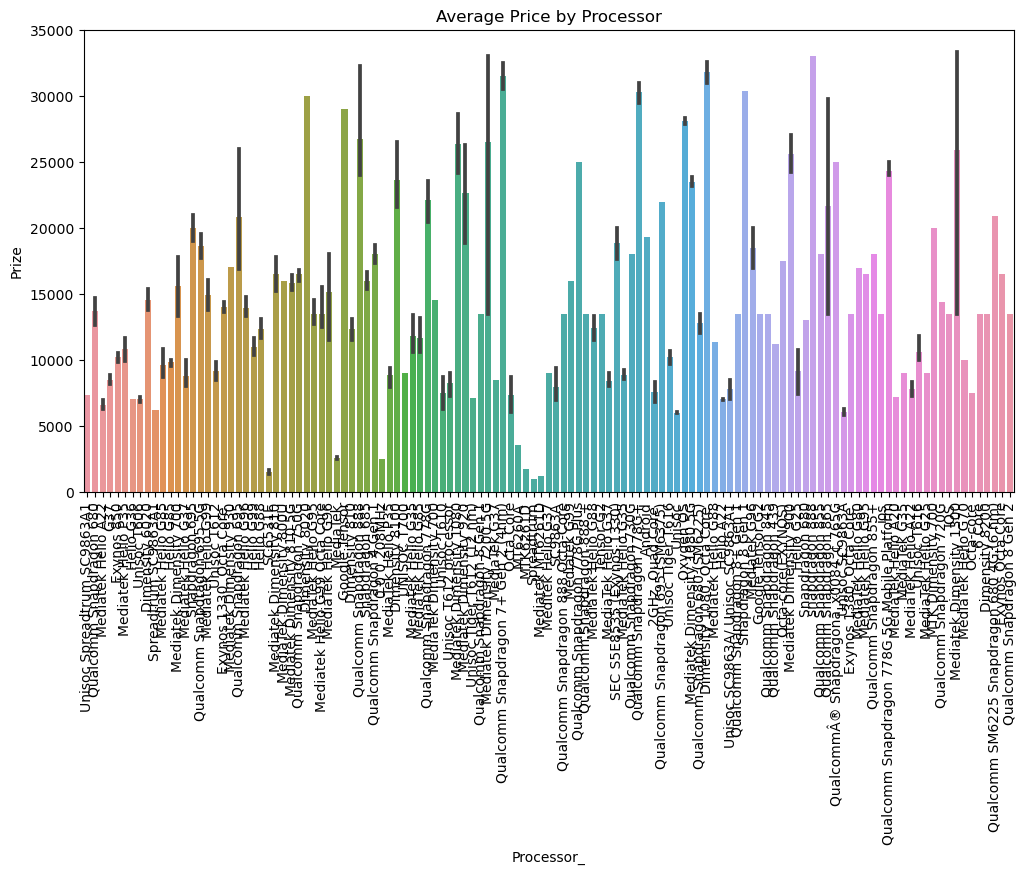

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Processor_', y='Prize')
plt.xticks(rotation=90)
plt.title('Average Price by Processor')
plt.show()

The insights from the average prize by processor plot indicate significant variations in prices based on the processor type. Processors such as "6 Core" and "snapdragon 888" tend to be associated with higher average prices, while others like "2GHz, Quad Core" and "Unisoc Tiger T612 (12 nm)" have comparatively lower average prices. This suggests that the processor choice plays a crucial role in determining the overall pricing of smartphones.

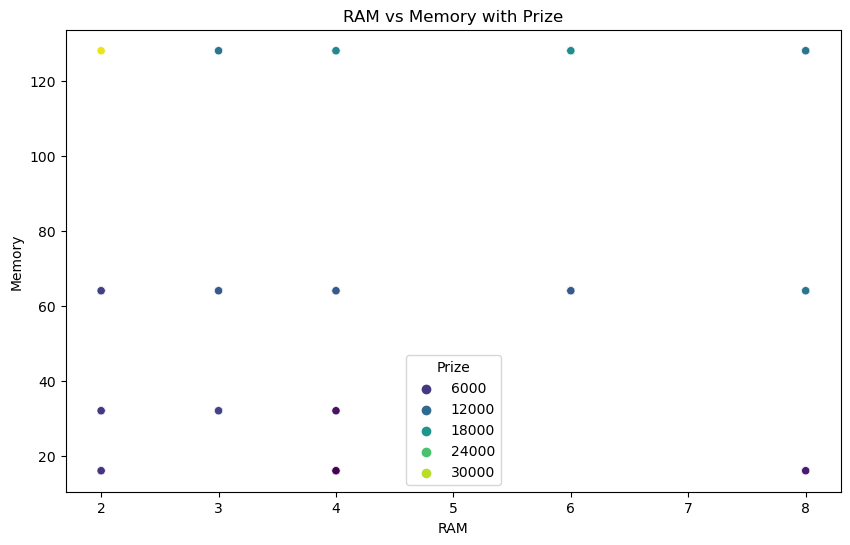

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Memory', hue='Prize', data=df, palette='viridis')
plt.title('RAM vs Memory with Prize')
plt.xlabel('RAM')
plt.ylabel('Memory')
plt.legend(title='Prize')
plt.show()

This scatter plot visualizes the relationship between RAM and Memory, with the color representing the Prize. It helps in understanding how the Prize varies concerning different combinations of RAM and Memory specifications in mobile devices. The plot suggests that higher RAM and Memory configurations tend to have higher prices, but there are exceptions, indicating other factors influencing pricing.

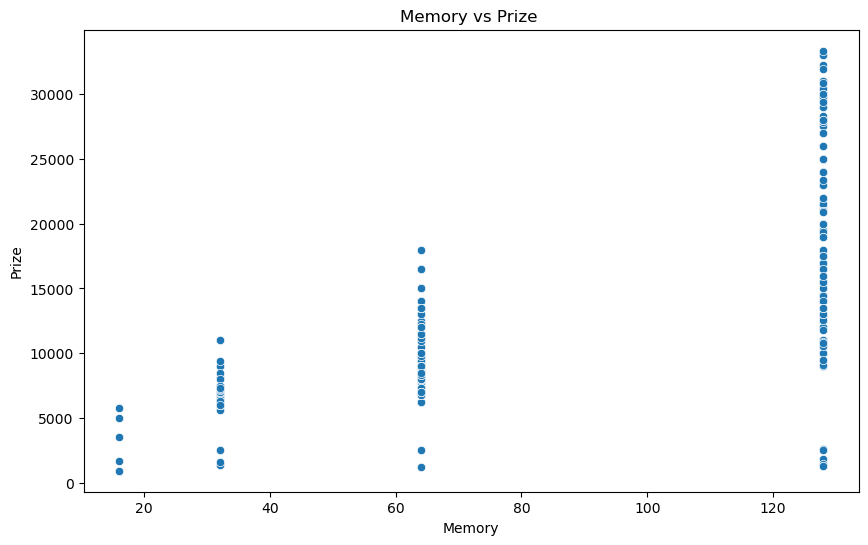

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Memory', y='Prize', data=df)
plt.title('Memory vs Prize ')
plt.xlabel('Memory')
plt.ylabel('Prize')
plt.show()

The memory (in GB) and corresponding prize (in units) of each mobile device in the dataset. The scatterplot visualizes the relationship between memory and prize, showing how the prize varies with different memory configurations across the mobile devices

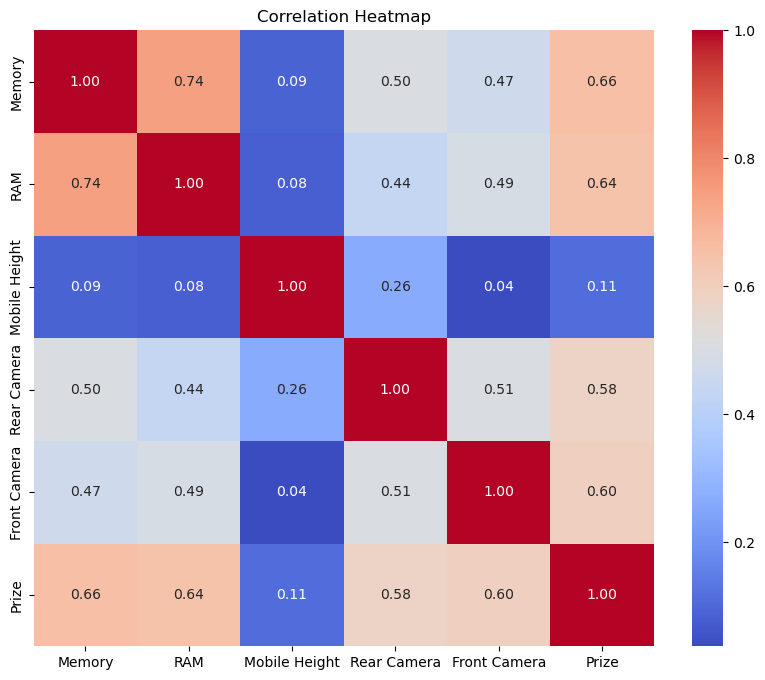

In [37]:
# correlation heatmap
correlation_matrix = df[['Memory','RAM', 'Mobile Height', 'Rear Camera', 'Front Camera', 'Prize']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Memory and RAM: Strong positive correlation (0.74) suggests that phones with higher memory tend to have higher RAM.

Prize and Rear Camera: Moderate positive correlation (0.8) implies that phones with higher prize may have better rear camera specifications.

RAM and Rear Camera: Moderate positive correlation (0.440) indicates that phones with higher RAM may have better rear camera specifications.

Memory, RAM, and Prize: Moderate positive correlation (0.66 for Memory, 0.64 for RAM) suggests that phones with higher memory and RAM may tend to have higher prices.

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

# Feature Enginerring

In [39]:
df['Memory_to_RAM_Ratio'] = df['Memory'] / df['RAM']

In [40]:
# Define columns to encode
columns_to_encode = ['Model', 'Colour', 'Processor_']

# Perform label encoding
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])



In [41]:
# Feature Scaling
scaler = StandardScaler()
numerical_cols = ['Memory', 'RAM', 'Battery_', 'Mobile Height', 'Rear Camera', 'Front Camera', 'AI Lens', 'Prize']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [42]:
from sklearn.model_selection import train_test_split

# Assuming 'Prize' is the target variable
X = df.drop('Prize', axis=1)
y = df['Prize']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Instantiate the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


In [44]:
# Dictionary to store evaluation metrics
evaluation_metrics = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': []}


In [45]:
# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Store evaluation metrics
    evaluation_metrics['Model'].append(name)
    evaluation_metrics['MAE'].append(mae)
    evaluation_metrics['MSE'].append(mse)
    evaluation_metrics['RMSE'].append(rmse)

In [46]:
# Create DataFrame for comparison
comparison_df = pd.DataFrame(evaluation_metrics)

In [47]:
# Print comparison table
print(comparison_df)

               Model       MAE       MSE      RMSE
0  Linear Regression  0.367453  0.281363  0.530436
1      Random Forest  0.146421  0.061231  0.247450
2  Gradient Boosting  0.161787  0.056639  0.237989


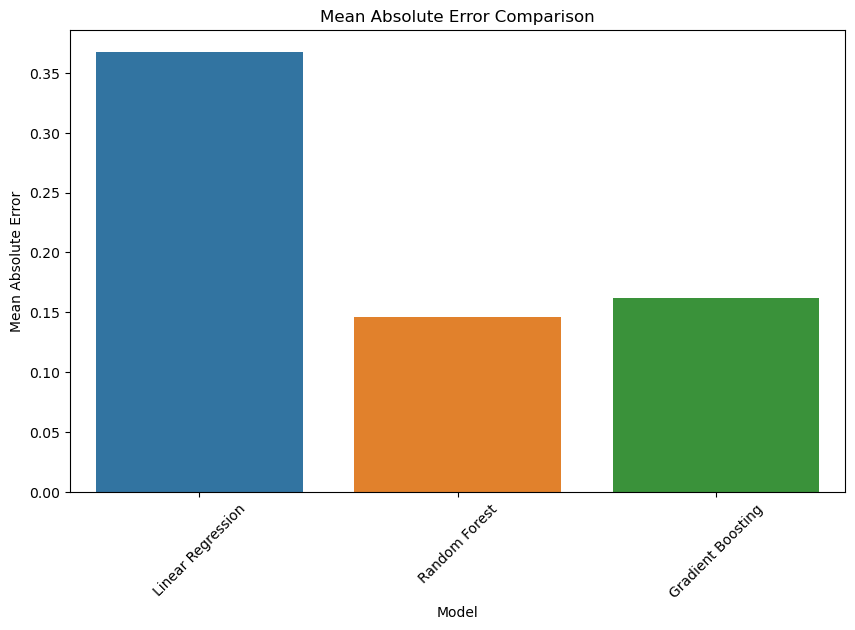

In [48]:
# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=comparison_df)
plt.title('Mean Absolute Error Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

# Random Forest fine-tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Gradient Boosting fine-tuning
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_grid_search = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_


In [50]:
best_gb_model

GradientBoostingRegressor(max_depth=5, n_estimators=50)

In [51]:
# Feature importance analysis for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Feature importance analysis for Gradient Boosting
gb_feature_importances = best_gb_model.feature_importances_

# Create DataFrames to display feature importances
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})
gb_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': gb_feature_importances})

# Sort DataFrames by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:\n", rf_feature_importance_df)
print("\nGradient Boosting Feature Importances:\n", gb_feature_importance_df)


Random Forest Feature Importances:
                 Feature  Importance
6          Front Camera    0.520208
0                 Model    0.096508
9            Processor_    0.095414
5           Rear Camera    0.089938
2                Memory    0.062811
8         Mobile Height    0.043555
3                   RAM    0.041406
1                Colour    0.040622
10  Memory_to_RAM_Ratio    0.009539
4              Battery_    0.000000
7               AI Lens    0.000000

Gradient Boosting Feature Importances:
                 Feature  Importance
6          Front Camera    0.529051
9            Processor_    0.114064
0                 Model    0.097705
5           Rear Camera    0.073994
2                Memory    0.066117
3                   RAM    0.050192
8         Mobile Height    0.037332
1                Colour    0.019558
10  Memory_to_RAM_Ratio    0.011987
4              Battery_    0.000000
7               AI Lens    0.000000


The provided feature importances show the contribution of each feature to the predictive performance of the Random Forest and Gradient Boosting models.

Random Forest Feature Importances:

The most important feature is "Front Camera," followed by "Model" and "Phone Company."
Notably, "Battery_" and "AI Lens" have zero importance, indicating that they do not significantly contribute to the model's predictions.
Features like "Memory," "RAM," and "Rear Camera" also contribute to some extent but are less influential compared to "Front Camera" and other top features.
Gradient Boosting Feature Importances:

Similarly, "Front Camera" is the most important feature for the Gradient Boosting model, followed by "Phone Company" and "Processor_."
"Battery_" and "AI Lens" again have zero importance in this model.
The importance of features like "Memory," "RAM," and "Mobile Height" is consistent with the Random Forest model.


Overall, both models prioritize "Front Camera," "Model," and "Phone Company" as the most important features. However, there are slight differences in the rankings and importance values of other features between the two models.

In [52]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
rf_cv_mae = -rf_cv_scores.mean()

# Cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
gb_cv_mae = -gb_cv_scores.mean()

print("Random Forest Cross-validation MAE:", rf_cv_mae)
print("Gradient Boosting Cross-validation MAE:", gb_cv_mae)


Random Forest Cross-validation MAE: 0.31496564210377354
Gradient Boosting Cross-validation MAE: 0.30669008993432545


The mean absolute error (MAE) obtained from cross-validation for both the Random Forest and Gradient Boosting models is relatively close, with the Random Forest model having a slightly higher MAE of approximately 0.3149 compared to the Gradient Boosting model's MAE of about 0.3067.

This indicates that both models perform similarly in terms of their ability to predict the target variable. However, further analysis such as comparing other evaluation metrics or examining model interpretability could provide additional insights into their performance and behavior

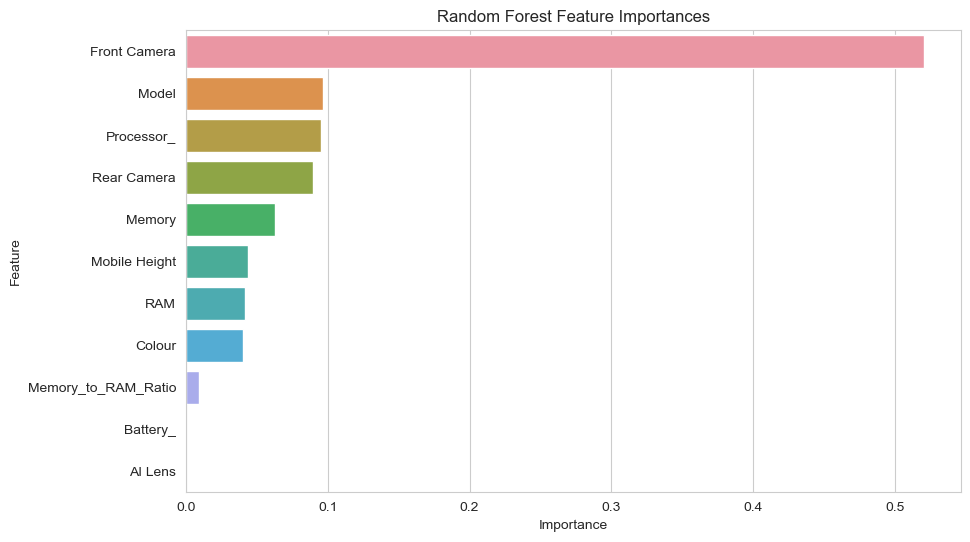

In [53]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot Random Forest Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

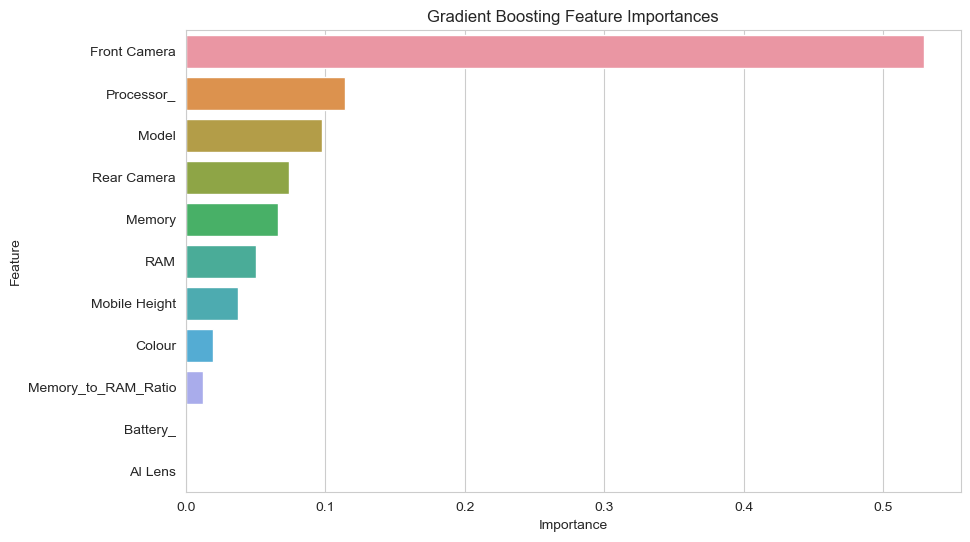

In [54]:
# Plot Gradient Boosting Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance_df)
plt.title('Gradient Boosting Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()